In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpb
import pandas as pd
import numpy as np
from scipy.stats import skew
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set_theme()

In [2]:
# Loading datasets

train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

### Data Preprocessing

In [3]:
# looking at dimensions of Data

print(train_data.shape)
test_data.shape

(1460, 81)


(1459, 80)

In [4]:
# Finding missing values.

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

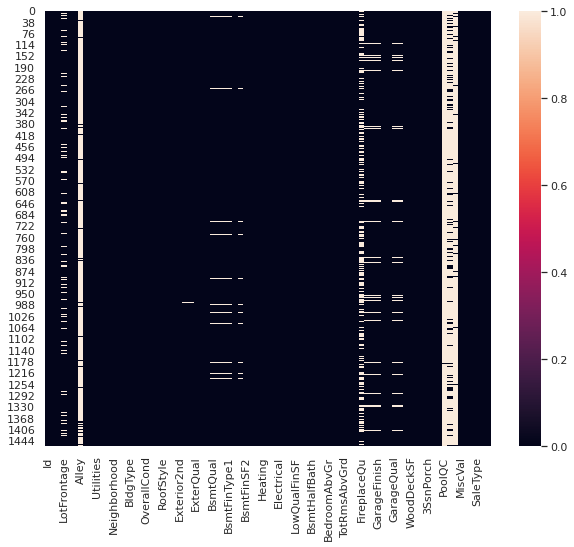

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(train_data.isnull(), ax=ax)

In [7]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# look at train data
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

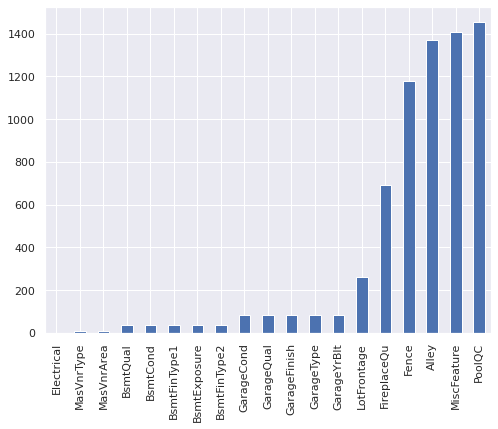

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(ax=ax)

## Handle missing values

In [11]:
## Handling missing values on train data

train_data['LotFrontage']= train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

train_data['BsmtCond']= train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])

train_data['BsmtQual']= train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])

train_data['FireplaceQu']= train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])

train_data['GarageType']= train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])

train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])

train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])

train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])

train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])

train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())

train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])

train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])

train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])

train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())

#BsmtExposure   


In [12]:
## Handling missing values on test data

test_data['LotFrontage']= test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())

test_data['BsmtCond']= test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])

test_data['BsmtQual']= test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])

test_data['FireplaceQu']= test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])

test_data['GarageType']= test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])

test_data['GarageFinish']= test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])

test_data['GarageQual']= test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])

test_data['GarageCond']= test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])

test_data['MasVnrType']= test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])

test_data['MasVnrArea']= test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())

test_data['BsmtFinType2']= test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])

test_data['BsmtFinType1']= test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])

test_data['BsmtExposure']= test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])

test_data['GarageYrBlt']= test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())


In [13]:
train_data.drop([ 'Alley',  'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)
test_data.drop([ 'Alley',  'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)

<AxesSubplot:>

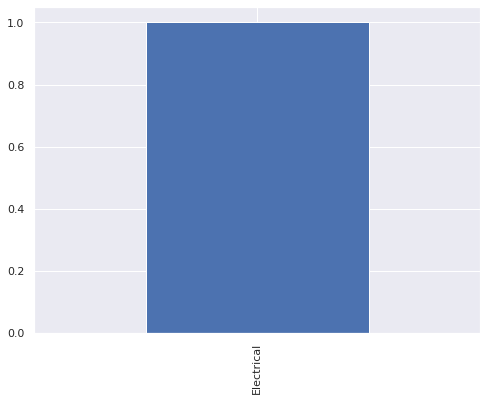

In [14]:
train_data.isnull().sum()

# Again have a look at missing values 

fig, ax = plt.subplots(figsize=(8,6))
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(ax=ax)

#### Only one missing value left so leave it. We will deal with it further

<AxesSubplot:>

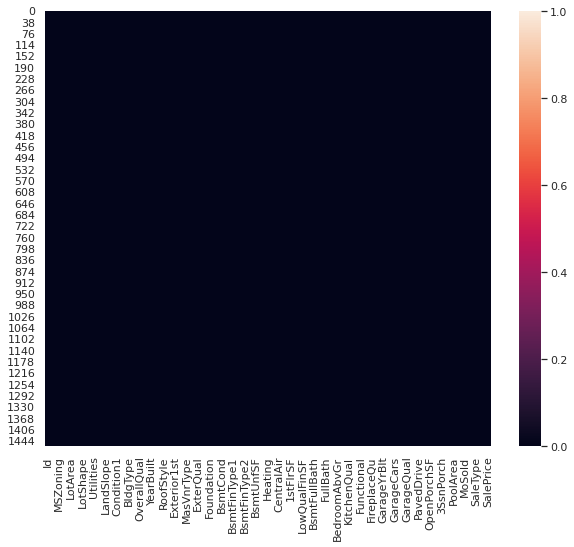

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(train_data.isnull(), ax=ax)

## Corelation Matrix 

<AxesSubplot:>

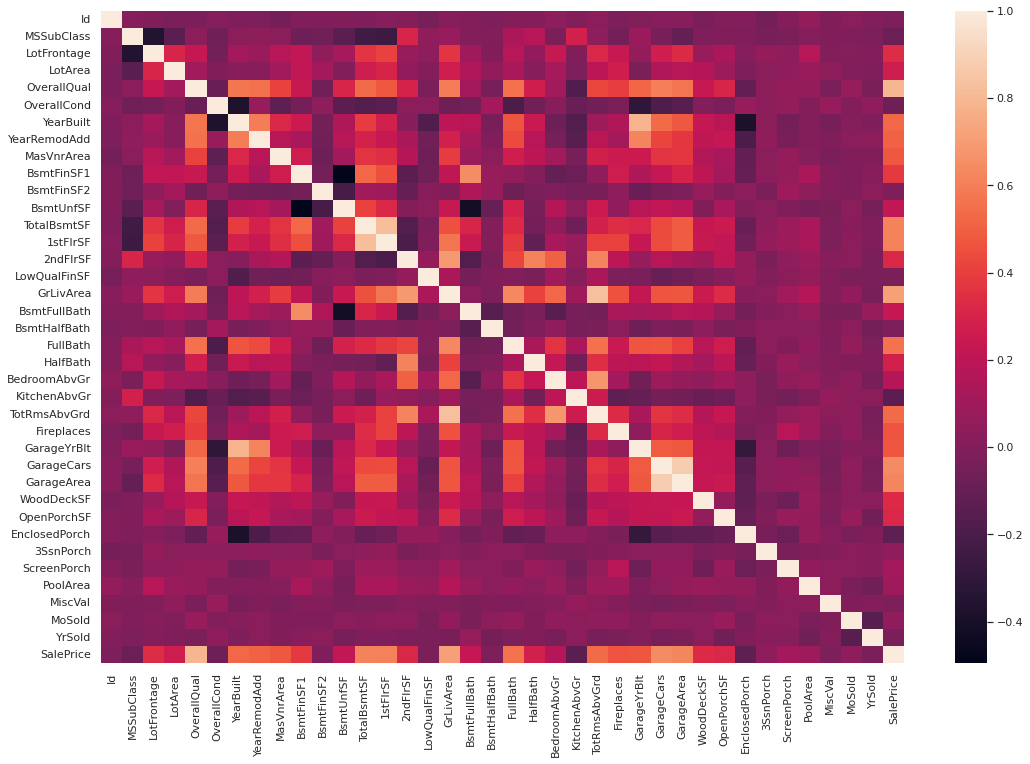

In [16]:
# relationship between features
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr)

## Target Feature seprateing 

In [17]:
target = ['SalePrice']
cat_features = train_data.drop(columns=['Id', 'SalePrice']).select_dtypes(include='object').columns.tolist()
num_features = train_data.drop(columns=['Id', 'SalePrice']).select_dtypes(include=np.number).columns.tolist()
all_features = cat_features + num_features


## Log use to transform the data


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

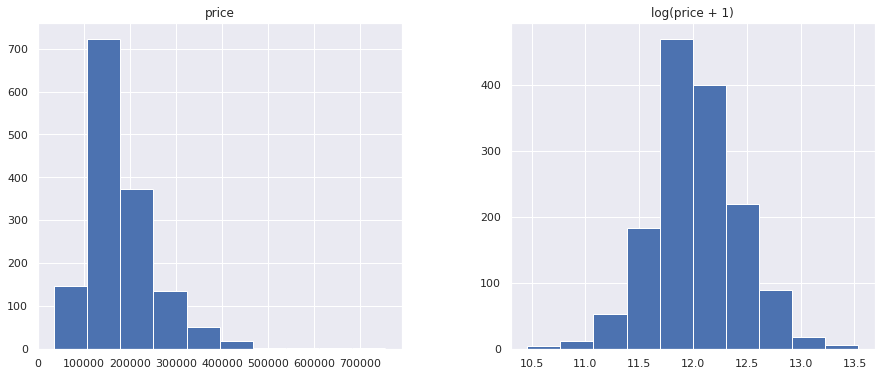

In [18]:
mpb.rcParams['figure.figsize'] = (15.0, 6.0)
prices = pd.DataFrame({"price":train_data["SalePrice"], "log(price + 1)":np.log1p(train_data['SalePrice'])})
prices.hist()

In [19]:
train_data.SalePrice = np.log(train_data.SalePrice)

## label Encoding 

In [20]:
# Pipeline for categorical features
cat_tfms = Pipeline(steps=[
    ('cat_ordenc', ce.OrdinalEncoder(return_df=True, handle_unknown='value', handle_missing='value'))
])

# Pipeline for numerical features
num_tfms = Pipeline(steps=[
    ('num_imputer',  SimpleImputer(missing_values=np.nan, strategy='median'))
])

features = ColumnTransformer(transformers=[
    ('cat_tfms', cat_tfms, cat_features),
    ('num_tfms', num_tfms, num_features)
], remainder='passthrough')

In [21]:
X = train_data[all_features]
y = train_data.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,random_state=42)
X_train_tf = pd.DataFrame(features.fit_transform(X_train), columns=all_features)
X_test_tf = pd.DataFrame(features.fit_transform(X_test), columns=all_features)
test_tf = test_data[all_features]
test_tf = pd.DataFrame(features.transform(test_tf), columns=all_features)
enc_map = dict()
for feat in cat_features: enc_map[feat] = dict(zip(X_train[feat], X_train_tf[feat]))

In [22]:
print("X_train shape: ", X_train_tf.shape)
print("test shape:", test_tf.shape)

X_train shape:  (1095, 75)
test shape: (1459, 75)


## using Random forest model

In [23]:
rf = RandomForestRegressor(
    n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2,
    max_features=.7, max_samples=None, n_jobs=-1, random_state=42)

In [24]:
rf.fit(X_train_tf, y_train)

RandomForestRegressor(max_features=0.7, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [25]:
y_preds = rf.predict(X_test_tf)

## Root mean Squared Error

In [26]:
rmse = mean_squared_error(y_test, y_preds, squared=False)
rmse

0.15333665873060015

In [27]:
preds = rf.predict(test_tf)

In [28]:
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': preds})
output.to_csv('my_submission.csv', index=False)

print("Your submission was successfully saved.")


Your submission was successfully saved.


In [29]:
print(output.head())

     Id  SalePrice
0  1461  11.764510
1  1462  11.978674
2  1463  12.082087
3  1464  12.108670
4  1465  12.210217
